In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image
plt.rcParams.update({'font.size': 16})

In [2]:
path_conf = "/home/giacomo/comp_bio/cbp_final/data/01_raw/02_NPT/04_npt_4/step5_prod_4.tpr"
path_traj = "/home/giacomo/comp_bio/cbp_final/data/02_processed/02_prod/prod_cat.xtc"
path_out = "/home/giacomo/comp_bio/cbp_final/data/03_analyzed/graphs/"
path_ini = path_out
path_pdb = "/home/giacomo/comp_bio/cbp_final/data/00_external/pdb_3EIG_prot.pdb"

In [3]:
def plot_heatmap(matrix,
                title = "title",
                xlabel = "Columns",
                ylabel = "Rows",
                clabel="value"):
    """
    Plots a heatmap for a given NumPy matrix with a colorbar.

    Parameters:
        matrix (numpy.ndarray): 2D array to visualize as a heatmap.
    """
    plt.figure(figsize=(6, 5))
    heatmap = plt.imshow(matrix, cmap='inferno_r', aspect='auto')
    plt.colorbar(heatmap, label=clabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Calculation of interactions

# Cutoff plots

## Salt bridges

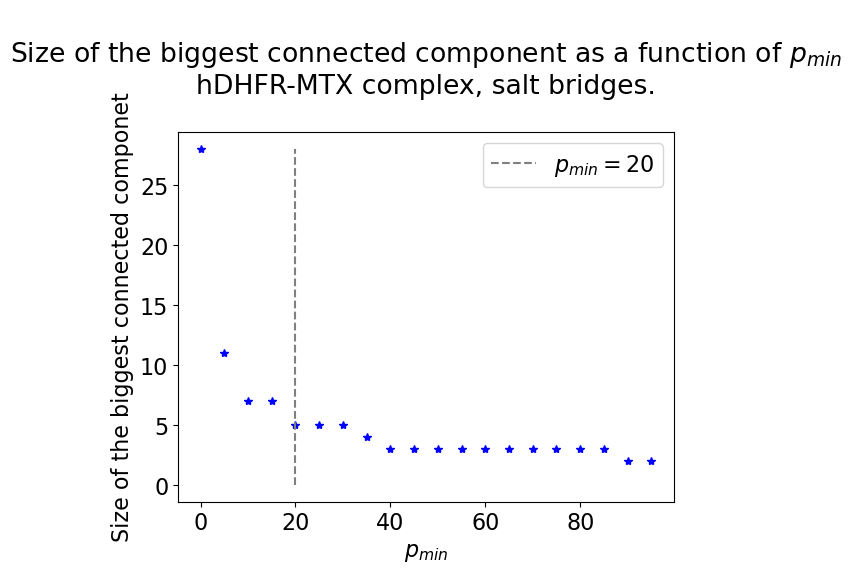

In [4]:
# Image(f"{path_out}clusters_plot_sb.png")

cluster_size_sb_path = "/home/giacomo/comp_bio/cbp_final/data/03_analyzed/graphs/cluster_size_sb.dat"
cluster_size_sb = np.loadtxt(cluster_size_sb_path, skiprows=1)
plt.plot(cluster_size_sb[:, 0], cluster_size_sb[:, 1], '*b')
plt.vlines(20, 0, max(cluster_size_sb[:, 1]), colors="grey", linestyles="dashed", label=r"$p_{min} = 20$")
plt.legend()
title = r"""
Size of the biggest connected component as a function of $p_{min}$
hDHFR-MTX complex, salt bridges.
"""
plt.title(title)
plt.xlabel(r"$p_{min}$")
plt.ylabel("Size of the biggest connected componet")
plt.show()

## Hydrogen bonds

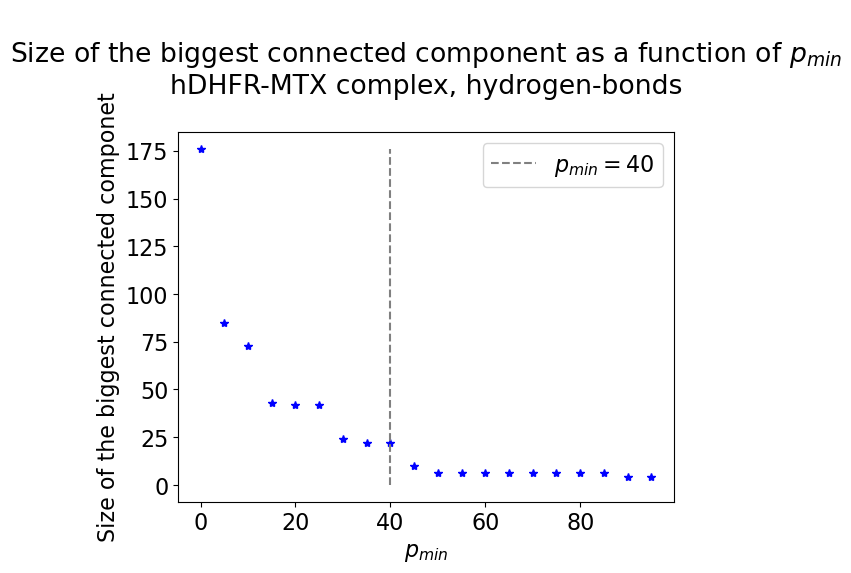

In [5]:
# Image(f"{path_out}clusters_plot_hb.png")

cluster_size_hb_path = "/home/giacomo/comp_bio/cbp_final/data/03_analyzed/graphs/cluster_size_hb.dat"
cluster_size_hb = np.loadtxt(cluster_size_hb_path, skiprows=1)
plt.plot(cluster_size_hb[:, 0], cluster_size_hb[:, 1], '*b')
plt.vlines(40, 0, max(cluster_size_hb[:, 1]), colors="grey", linestyles="dashed", label=r"$p_{min} = 40$")
plt.legend()
title = r"""
Size of the biggest connected component as a function of $p_{min}$
hDHFR-MTX complex, hydrogen-bonds
"""
plt.title(title)
plt.xlabel(r"$p_{min}$")
plt.ylabel("Size of the biggest connected componet")
plt.show()

## Hydrofobic interactions

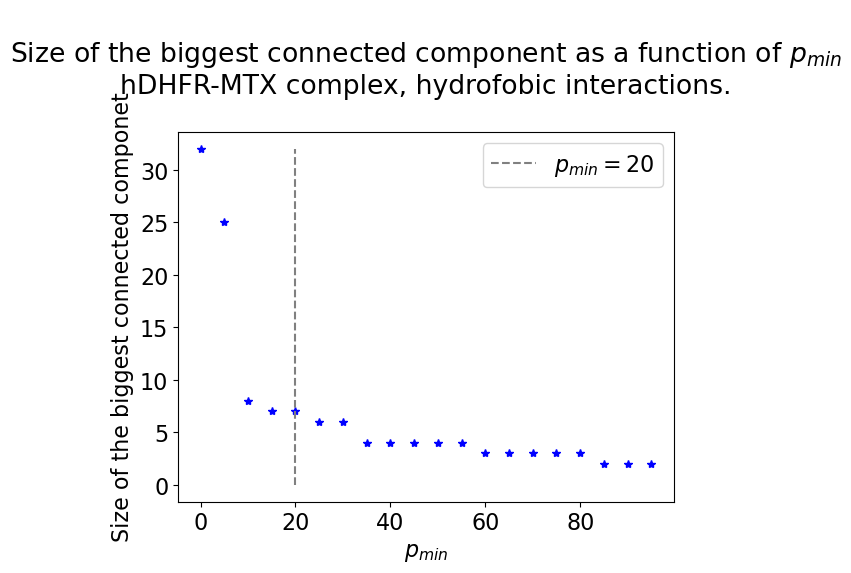

In [6]:
# Image(f"{path_out}clusters_plot_hc.png")

cluster_size_hc_path = "//home/giacomo/comp_bio/cbp_final/data/03_analyzed/graphs/cluster_size_hc.dat"
cluster_size_hc = np.loadtxt(cluster_size_hc_path, skiprows=1)
plt.plot(cluster_size_hc[:, 0], cluster_size_hc[:, 1], '*b')
plt.vlines(20, 0, max(cluster_size_hc[:, 1]), colors="grey", linestyles="dashed", label=r"$p_{min} = 20$")
plt.legend()
title = r"""
Size of the biggest connected component as a function of $p_{min}$
hDHFR-MTX complex, hydrofobic interactions.
"""
plt.title(title)
plt.xlabel(r"$p_{min}$")
plt.ylabel("Size of the biggest connected componet")
plt.show()

# Filtering the graphs

# Macro IIN

## Unweighted

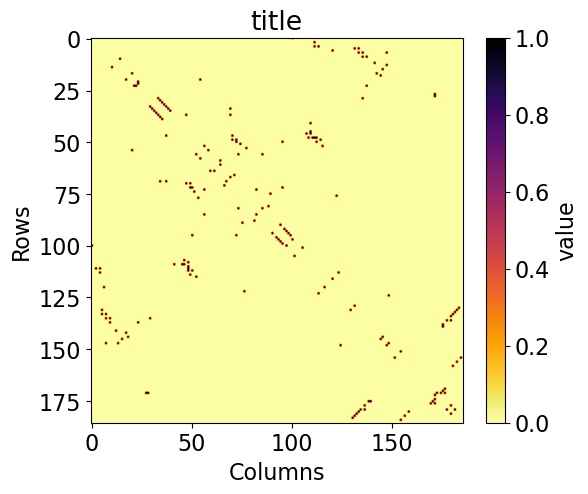

In [7]:
matrix = np.loadtxt(f"{path_out}macro_IIN_unweighted.dat", delimiter=" ")
plot_heatmap(matrix)

## Weighted

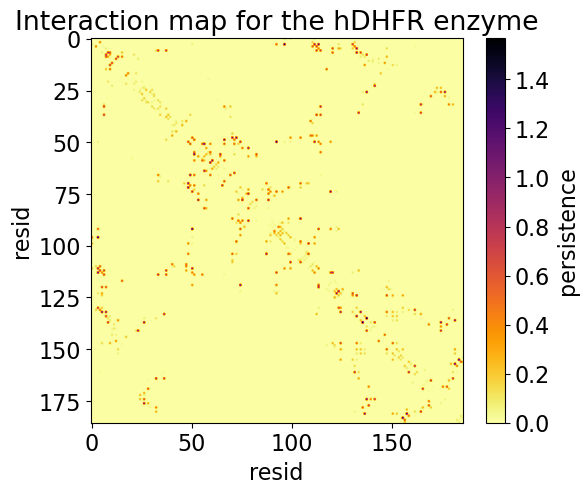

In [8]:
matrix_weighted = np.loadtxt(f"{path_out}macro_IIN_weighted.dat", delimiter=" ")
plot_heatmap(np.abs(matrix_weighted),
            title = "Interaction map for the hDHFR enzyme",
            xlabel="resid",
            ylabel="resid",
            clabel="persistence")

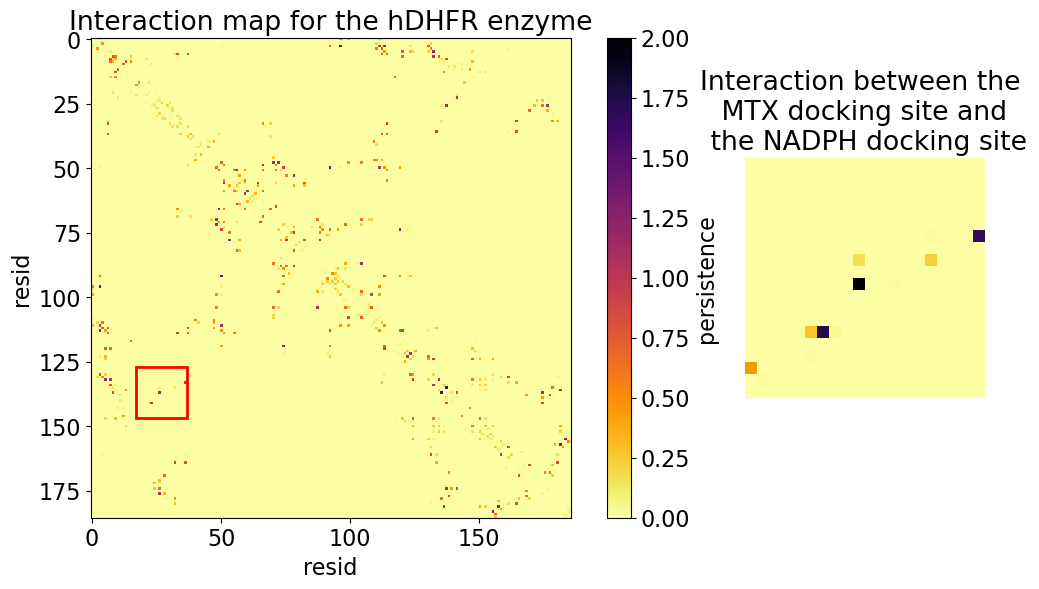

In [9]:
data = np.abs(matrix_weighted)

x_center, y_center, zoom_length = 137, 27, 20
x_start, x_end = x_center - zoom_length // 2, x_center + zoom_length // 2
y_start, y_end = y_center - zoom_length // 2, y_center + zoom_length // 2

# Create the figure and main heatmap axis
fig = plt.figure(figsize=(12, 6))
main_ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])  # Left part for the main heatmap
zoom_ax = fig.add_axes([0.7, 0.3, 0.25, 0.4])  # Right part for the zoomed heatmap

# Plot the main heatmap
cax = main_ax.imshow(data, cmap='inferno_r', interpolation='nearest', vmin=0, vmax=2)
main_ax.set_title("Interaction map for the hDHFR enzyme")
main_ax.set_xlabel("resid")
main_ax.set_ylabel("resid")


# Add a rectangle to highlight the zoomed-in area
rect = plt.Rectangle((y_start, x_start), zoom_length, zoom_length,
                     edgecolor='red', facecolor='none', linewidth=2)
main_ax.add_patch(rect)

# Add a colorbar for the main heatmap
fig.colorbar(cax, ax=main_ax, orientation='vertical', label="persistence")

# Plot the zoomed-in heatmap
zoom_ax.imshow(data[x_start:x_end, y_start:y_end], cmap='inferno_r', interpolation='nearest')
zoom_ax.set_title("Interaction between the \n MTX docking site and \n the NADPH docking site")
zoom_ax.axis('off')  # Hide the axes for clarity

# Display the figure
plt.show()

# Connected components

# Hubs

# Generating graphs